In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import shap
from scipy import stats
import seaborn as sns

Matriz de Confusión:
[[33  5]
 [ 3 35]]


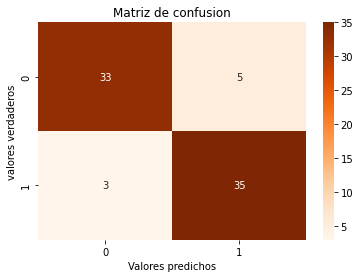

In [2]:
yv_pred=np.loadtxt("os42_yv_pred_bs1.csv",delimiter=";",skiprows=1)
xv=np.loadtxt("os42_xv_bs1.csv",delimiter=";",skiprows=1)
yv=np.loadtxt("os42_yv_bs1.csv",delimiter=";",skiprows=1)
yv=np.argmax(yv,axis=1)
yv_pred=np.argmax(yv_pred,axis=1)
matriz = confusion_matrix(yv, yv_pred)
print('Matriz de Confusión:')
print(matriz)
ax= plt.subplot()
sb.heatmap(matriz, annot=True, ax = ax, cmap="Oranges",fmt="d");
ax.set_xlabel('Valores predichos');ax.set_ylabel('valores verdaderos'); 
ax.set_title('Matriz de confusion'); 

In [3]:
shap.initjs()

In [5]:
features=["e0","e1","e42"]

In [7]:
from tensorflow import keras
model = keras.models.load_model('modelos/model_os42bs120230411-215731/')

2023-04-11 22:03:46.883101: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
explainer = shap.KernelExplainer(model.predict, xv)

3/3 [==============================] - 0s 2ms/step


In [9]:
shap_values = explainer.shap_values(xv)
shap.force_plot(explainer.expected_value[0], shap_values[0], xv,feature_names=features)

  0%|          | 0/76 [00:00<?, ?it/s]

15/15 [==============================] - 0s 575us/step


In [10]:
explainer = shap.DeepExplainer(model, xv)
shap_values = explainer.shap_values(xv)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [11]:
xv.shape

(76, 3)

In [12]:
len(shap_values)

2

In [13]:
len(shap_values[0])

76

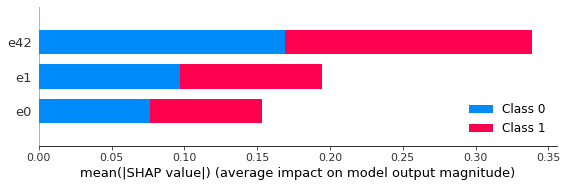

In [14]:
shap.summary_plot(shap_values, plot_type = 'bar',feature_names=features)

In [15]:
df=pd.DataFrame(xv,columns=features)
df["y"]=yv
df["yp"]=yv_pred

In [16]:
df

,e0,e1,e42,y,yp
0,1.0,0.0,1.0,0,0
1,0.0,1.0,1.0,0,0
2,1.0,0.0,1.0,0,0
3,1.0,1.0,1.0,0,0
4,0.0,0.0,0.0,1,1
...,...,...,...,...,...
71,1.0,1.0,1.0,0,0
72,1.0,0.0,1.0,0,0
73,1.0,0.0,1.0,1,0
74,1.0,0.0,0.0,0,1


In [17]:
df[(df["y"]==1) & (df["yp"]==0)]

,e0,e1,e42,y,yp
33,1.0,0.0,1.0,1,0
42,1.0,1.0,0.0,1,0
73,1.0,0.0,1.0,1,0


In [18]:
val_idx = df.index.get_indexer_for([33,42,73])

In [19]:
df.iloc[val_idx][features]

,e0,e1,e42
33,1.0,0.0,1.0
42,1.0,1.0,0.0
73,1.0,0.0,1.0


Usamos la componente 1, asociada al valor positivo para determinar que atributos determinaron su clasificación

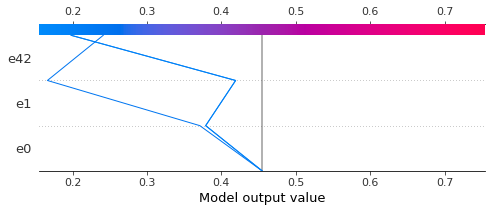

In [20]:
shap.decision_plot(explainer.expected_value[1].numpy(), shap_values[1][val_idx], 
                   features = df.iloc[val_idx][features], 
                   feature_names = features)

In [21]:
shap.force_plot(explainer.expected_value[1].numpy(), shap_values[1][val_idx],df.iloc[val_idx][features])

En la clase 0 (negativo) vemos como e0 aumenta la probabilidad de clasificación

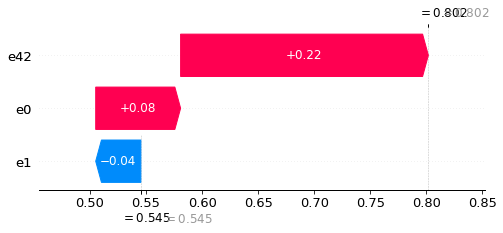

In [23]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][33], feature_names = features)

Cuando reversamos el análisis, y revisamos en la clase 1, vemos que e0 disminuye la probabilidad de clasificación

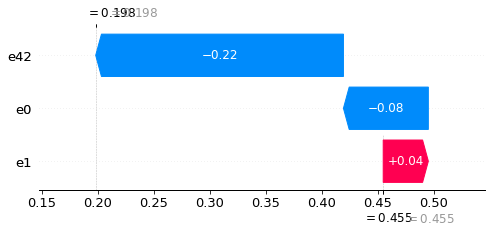

In [25]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1].numpy(), shap_values[1][33], feature_names = features)